In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
%matplotlib inline

# Визуелизација на спуштање по градиент 

In [6]:
X = np.random.random(20)
error = np.random.normal(0, 0.9, 20)
y = 3*X + error

<function matplotlib.pyplot.show(*args, **kw)>

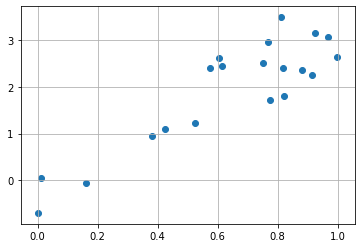

In [8]:
plt.scatter(X, y)
plt.grid()
plt.show

In [10]:
x, theta_1 = sym.symbols('x, theta_1')
temp_list = y.shape[0]*[theta_1*x]
temp_list = [temp.subs(x, X[i]) for i, temp in enumerate(temp_list)]
ar = sym.Array([y.tolist(), temp_list])
J = ar[0, :] - ar[1, :]
J = sum(J)
J = J**2
J_deriv = sym.diff(J, theta_1)
theta_1_optimal = float(sym.solvers.solve(J_deriv)[0])
print("Cost f_costunction: ", J, "\nDerivative of_cost cost f_costunction: ", J_deriv)

Cost f_costunction:  (38.3898532406616 - 12.7294262618448*theta_1)**2 
Derivative of_cost cost f_costunction:  324.076585911489*theta_1 - 977.361612060091


Iteration:  1 
Cost function value:  2613.18073685537 
Cost function derivative value:  -1301.43819797158 
theta_1 value:  -1


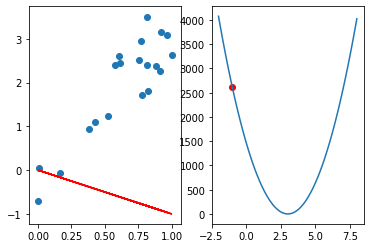

Iteration:  2 
Cost function value:  13120.8631487031 
Cost function derivative value:  2916.21828176273 
theta_1 value:  12.0143819797158


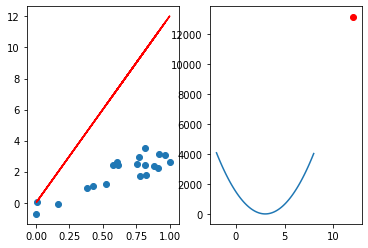

Iteration:  3 
Cost function value:  65880.2689530630 
Cost function derivative value:  -6534.56236350061 
theta_1 value:  -17.1478008379115


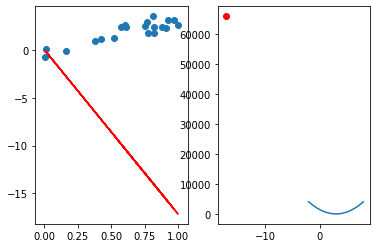

Iteration:  4 
Cost function value:  330786.914560336 
Cost function derivative value:  14642.4242483893 
theta_1 value:  48.1978227970946


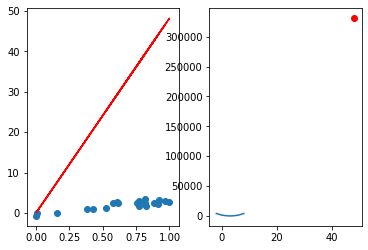

Iteration:  5 
Cost function value:  1660891.56257550 
Cost function derivative value:  -32810.2443504667 
theta_1 value:  -98.2264196867982


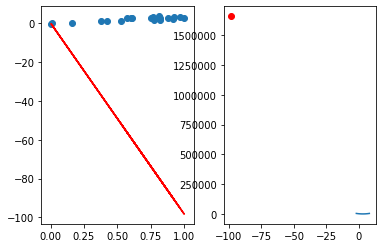

Iteration:  6 
Cost function value:  8339389.07861885 
Cost function derivative value:  73520.0753697431 
theta_1 value:  229.876023817869


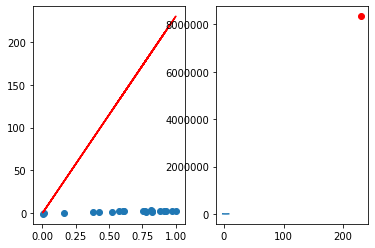

Iteration:  7 
Cost function value:  41872336.3834452 
Cost function derivative value:  -164741.274848074 
theta_1 value:  -505.324729879562


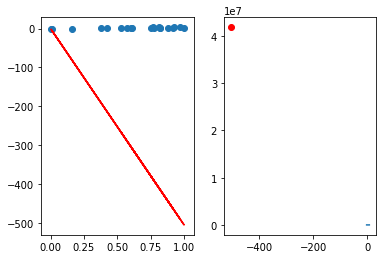

Iteration:  8 
Cost function value:  210242325.628338 
Cost function derivative value:  369146.624266627 
theta_1 value:  1142.08801860118


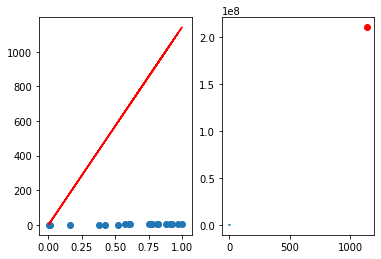

Iteration:  9 
Cost function value:  1055633368.07467 
Cost function derivative value:  -827171.152664171 
theta_1 value:  -2549.37822406509


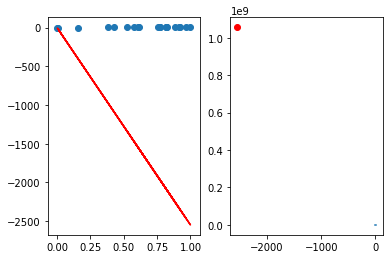

Iteration:  10 
Cost function value:  5300368536.46030 
Cost function derivative value:  1853496.87853459 
theta_1 value:  5722.33330257662


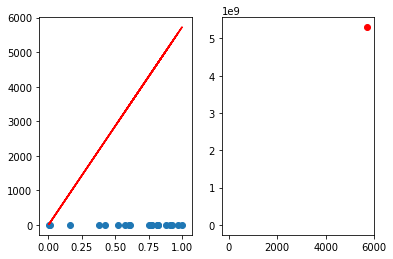

In [13]:
theta_1_trial = -1
deriv = J_deriv.subs(theta_1, theta_1_trial)
i = 0
theta_1_range = np.linspace(-2, 8, 100)
J_range = [J.subs(theta_1, theta_1_range[i]) for i, temp in enumerate(theta_1_range)]
iterations = 10
alpha = 0.01 # 0.005, 0.001, 0.01

while i < iterations:
    print("Iteration: ", i+1, "\nCost function value: ", J.subs(theta_1, theta_1_trial), "\nCost function derivative value: ", deriv, "\ntheta_1 value: ", theta_1_trial)
    plt.subplot(121)
    plt.scatter(X, y)
    plt.plot(X, X*theta_1_trial, c='r')
    
    plt.subplot(122)
    plt.plot(theta_1_range, J_range)
    plt.scatter(theta_1_trial, float(J.subs(theta_1, theta_1_trial)), c='r')
    plt.show()
    
    theta_1_trial = theta_1_trial - alpha*deriv
    deriv = J_deriv.subs(theta_1, theta_1_trial)
    i += 1


# Полиномна регресија

In [15]:
def computeCost(X, y, theta):           # calculate cost function value
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):              # in every iteration
        error = (X * theta.T) - y       # compute the error
        
        for j in range(parameters):     # for every parameter update the value
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost                  # returns theta vector and history of the cost value

In [20]:
m = 100
X = -2*np.random.random(m) + 2*np.random.random(m)
y = 3*X**3 + 5*X**2 + 10 + np.random.normal(0, 1, m)

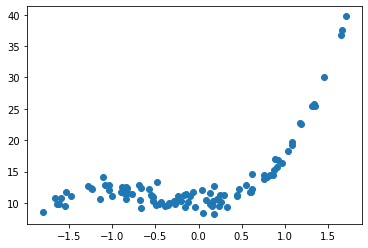

In [21]:
plt.scatter(X, y)

In [26]:
X_novo = np.vstack((X**3, X**2, X, np.ones(m))).T
theta, cost = gradientDescent(np.matrix(X_novo), np.matrix(y).T, np.matrix(np.array([1, 1, 1, 1])), 0.1, 1000)

In [28]:
theta

matrix([[ 3.06704894,  4.97590088, -0.14986763, 10.07355888]])

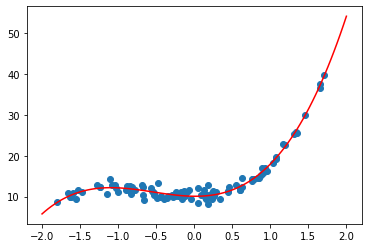

In [32]:
plt.scatter(X, y)
x_range = np.linspace(-2, 2, 100)
x_novo = np.vstack((x_range**3, x_range**2, x_range, np.ones(m))).T
y_predict = np.ravel(x_novo.dot(theta.T))
plt.plot(x_range, y_predict, 'r')

# Нормализација на податочно множество

In [2]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = theta
    for i in range(iters):              # in every iteration
        temp = (temp - alpha*X.T.dot((X.dot(temp)) - y))
        yield temp

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
m = 100
x1 = np.random.rand(m, 1)*2
x2 = np.random.rand(m, 1)
X = np.hstack((x1, x2, np.ones((m, 1))))
#X = sc.fit_transform(X)
theta_real = np.array([[2, 3, 1]]).T
y = X.dot(theta_real) + np.random.normal(0, 0.2, m).reshape(m, 1)

### Визуелизација без нормализација на податоците

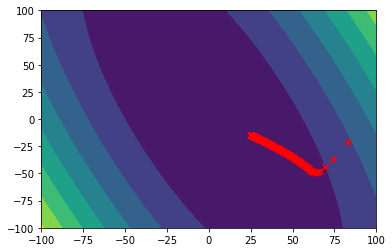

In [4]:
mx = 500
my = 500
theta1 = np.linspace(-100, 100, mx)
theta2 = np.linspace(-100, 100, my)
Theta1, Theta2 = np.meshgrid(theta1, theta2)
J = np.zeros((mx, my))
for i in range(mx):
    for j in range(my):
        pom = np.array([[Theta1[i, j], Theta2[i, j], 1]]).T
        J[i, j] = (1/(2*m)*(X.dot(pom) - y).T.dot(X.dot(pom) - y))[0, 0]
plt.contourf(Theta1, Theta2, np.array(J))
for th in gradientDescent(np.matrix(X), np.matrix(y), 10*np.matrix(np.array([[10, 10, 1]]).T), 2e-3, 100):
    plt.scatter(th[1, 0], th[2, 0], marker='x', c='r')

### Визуелизација со нормализација на податоците

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
m = 100
x1 = np.random.rand(m, 1)*2
x2 = np.random.rand(m, 1)
X = np.hstack((x1, x2, np.ones((m, 1))))
X = sc.fit_transform(X)
theta_real = np.array([[2, 3, 1]]).T
y = X.dot(theta_real) + np.random.normal(0, 0.2, m).reshape(m, 1)

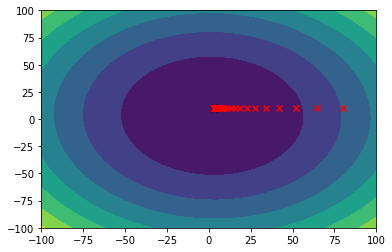

In [9]:
mx = 500
my = 500
theta1 = np.linspace(-100, 100, mx)
theta2 = np.linspace(-100, 100, my)
Theta1, Theta2 = np.meshgrid(theta1, theta2)
J = np.zeros((mx, my))
for i in range(mx):
    for j in range(my):
        pom = np.array([[Theta1[i, j], Theta2[i, j], 1]]).T
        J[i, j] = (1/(2*m)*(X.dot(pom) - y).T.dot(X.dot(pom) - y))[0, 0]
plt.contourf(Theta1, Theta2, np.array(J))
for th in gradientDescent(np.matrix(X), np.matrix(y), 10*np.matrix(np.array([[10, 10, 1]]).T), 2e-3, 100):
    plt.scatter(th[1, 0], th[2, 0], marker='x', c='r')